In [174]:
import os
import ast
import numpy as np

import matplotlib.pyplot as plt
from scipy.interpolate import griddata


In [175]:


angles = [0,45,90,135,180,215,270,315]  # Add more angles if needed
rssi_values = []

# Construct the file path and load data
for angle in angles:
    file_path = f'RSSI_Data/rssi_list_{angle}_degree.txt'

    # Check if the file exists
    if os.path.exists(file_path):
        with open(file_path, 'r') as f:
            for line in f:
                line = line.strip()
                try:
                    item = ast.literal_eval(line)
                    rssi_values.append(item)
                except (ValueError, SyntaxError) as e:
                    print(f"Skipping malformed line in {file_path}: {line} - {e}")
        
    else:
        print(f"File {file_path} does not exist.")

#rssi_values += [[0,0,-75],
 #              [0,2,-75],
  #              [2,0,-75],
   #             [2,2,-75]]
# Convert the combined list to a numpy array
points = np.array(rssi_values, dtype=float)

# Remove rows with any `nan` values
points = points[~np.isnan(points).any(axis=1)]

print("Filtered data as numpy array (without `nan` rows):")
print(points)


Skipping malformed line in RSSI_Data/rssi_list_0_degree.txt: [1.1, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x76fc74cc2da0>
Skipping malformed line in RSSI_Data/rssi_list_0_degree.txt: [1.2, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x76fc74cc0d60>
Skipping malformed line in RSSI_Data/rssi_list_0_degree.txt: [1.3, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x76fc74cc1300>
Skipping malformed line in RSSI_Data/rssi_list_0_degree.txt: [1.4, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x76fc74cc1cf0>
Skipping malformed line in RSSI_Data/rssi_list_0_degree.txt: [1.4, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x76fc74cc1ea0>
Skipping malformed line in RSSI_Data/rssi_list_0_degree.txt: [1.5, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x76fc74cc06a0>
Skipping malformed line in RSSI_Data/rssi_list_0_degree.txt: [1.6, 1.0, nan] - malformed node 

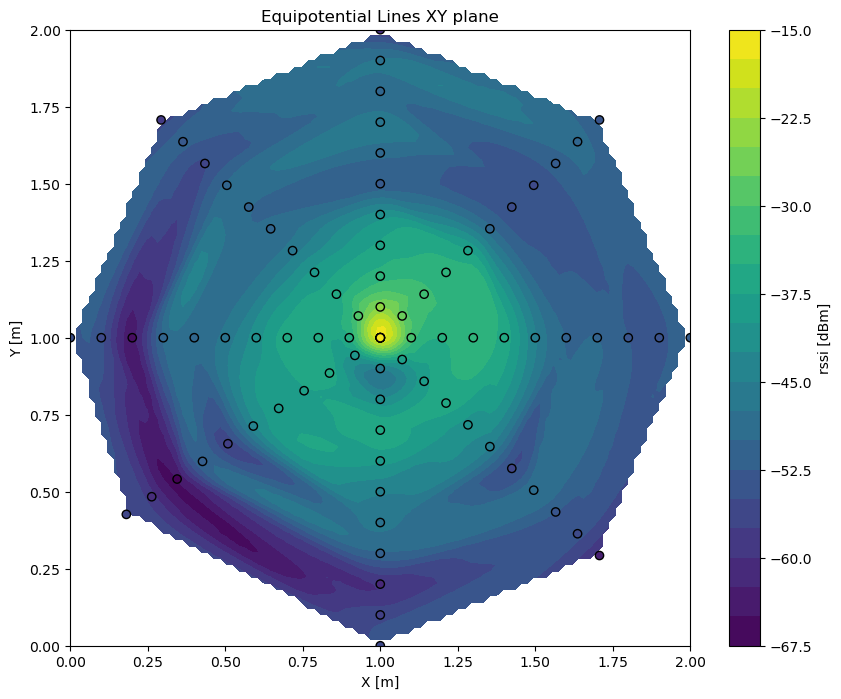

In [176]:
# Extract x, y, and k values
x = points[:, 0]
y = points[:, 1]
k = points[:, 2]

# Create grid values first
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the data
zi = griddata((x, y), k, (xi, yi), method='cubic')

# Plot the data
plt.figure(figsize=(10, 8))
cp = plt.contourf(xi, yi, zi, 20, cmap='viridis')  # Adjust the number of levels
plt.colorbar(cp, label = 'rssi [dBm]')  # Add a color bar which maps values to colors
plt.scatter(x, y, c=k, edgecolors='k',cmap='viridis')  # Add scatter plot for original data points
plt.title('Equipotential Lines XY plane')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.show()

In [177]:
angles = [0,45,90,135,180, 225,270,315]  # Add more angles if needed
test_array = []

# Construct the file path and load data
for angle in angles:
    file_path = f'RSSI_Data/rssi_list_{angle}_degree_xz.txt'

    # Check if the file exists
    if os.path.exists(file_path):
        with open(file_path, 'r') as f:
            for line in f:
                line = line.strip()
                try:
                    item = ast.literal_eval(line)
                    test_array.append(item)
                except (ValueError, SyntaxError) as e:
                    print(f"Skipping malformed line in {file_path}: {line} - {e}")
        
    else:
        print(f"File {file_path} does not exist.")

#test_array += [[0,0,-70],
 #              [0,2,-70],
 #               [2,0,-70],
 #               [2,2,-70]]

# Convert the combined list to a numpy array
points = np.array(test_array, dtype=float)

# Remove rows with any `nan` values
points = points[~np.isnan(points).any(axis=1)]

print("Filtered data as numpy array (without `nan` rows):")
print(points)

Skipping malformed line in RSSI_Data/rssi_list_0_degree_xz.txt: [1.3, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x76fc7fc287c0>
Skipping malformed line in RSSI_Data/rssi_list_0_degree_xz.txt: [1.7, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x76fc74cc0dc0>
Skipping malformed line in RSSI_Data/rssi_list_0_degree_xz.txt: [2.1, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x76fc74cc18a0>
Skipping malformed line in RSSI_Data/rssi_list_45_degree_xz.txt: [1.4949747468305832, 1.4949747468305832, nan] - malformed node or string on line 1: <ast.Name object at 0x76fc74cc3310>
Skipping malformed line in RSSI_Data/rssi_list_45_degree_xz.txt: [1.6363961030678928, 1.6363961030678928, nan] - malformed node or string on line 1: <ast.Name object at 0x76fc74cc18d0>
Skipping malformed line in RSSI_Data/rssi_list_90_degree_xz.txt: [1.0, 1.5, nan] - malformed node or string on line 1: <ast.Name object at 0x76fc710dbcd0>
Skipping malf

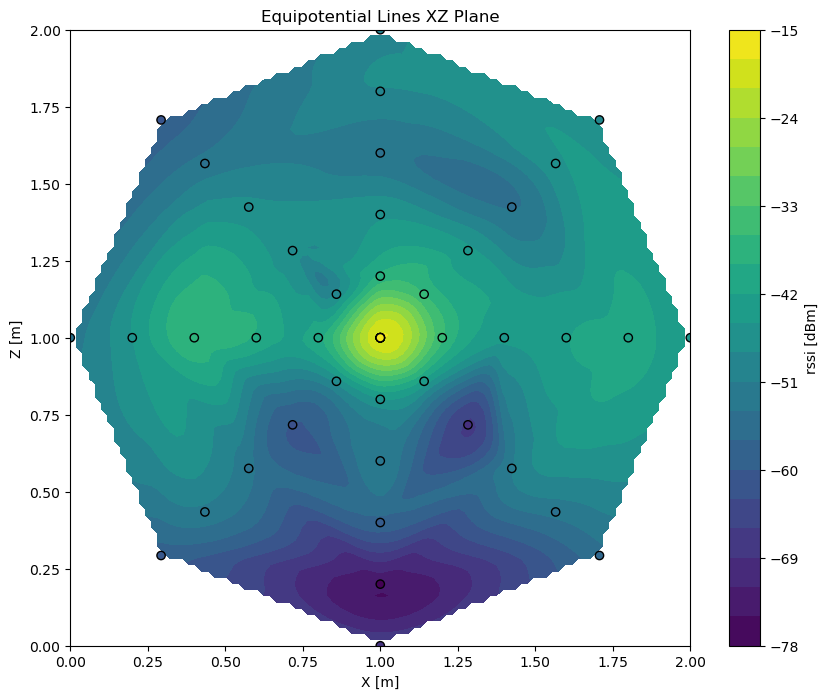

In [178]:

# Extract x, y, and k values
x = points[:, 0]
z = points[:, 1]
k = points[:, 2]

# Create grid values first
xi = np.linspace(min(x), max(x), 100)
zi = np.linspace(min(z), max(z), 100)
xi, zi = np.meshgrid(xi, yi)

# Interpolate the data
rssi = griddata((x, z), k, (xi, zi), method='cubic')

# Plot the data
plt.figure(figsize=(10, 8))
cp = plt.contourf(xi, zi, rssi, 20, cmap='viridis')  # Adjust the number of levels
plt.colorbar(cp ,label= 'rssi [dBm]')  # Add a color bar which maps values to colors
plt.scatter(x, z, c=k, edgecolors='k',cmap='viridis')  # Add scatter plot for original data points
plt.title('Equipotential Lines XZ Plane')
plt.xlabel('X [m]')
plt.ylabel('Z [m]')
plt.show()

In [179]:
angles = [0,315,270, 45,90]  # Add more angles if needed
test_array = []

# Construct the file path and load data
for angle in angles:
    file_path = f'RSSI_Data/rssi_list_{angle}_degree_beacon_antenna_angle.txt'

    # Check if the file exists
    if os.path.exists(file_path):
        with open(file_path, 'r') as f:
            for line in f:
                line = line.strip()
                try:
                    item = ast.literal_eval(line)
                    test_array.append(item)
                except (ValueError, SyntaxError) as e:
                    print(f"Skipping malformed line in {file_path}: {line} - {e}")
        
    else:
        print(f"File {file_path} does not exist.")

# Convert the combined list to a numpy array
points = np.array(test_array, dtype=float)

# Remove rows with any `nan` values
points = points[~np.isnan(points).any(axis=1)]

print("Filtered data as numpy array (without `nan` rows):")
print(points)

Skipping malformed line in RSSI_Data/rssi_list_0_degree_beacon_antenna_angle.txt: [1.1, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x76fc710d8160>
Skipping malformed line in RSSI_Data/rssi_list_0_degree_beacon_antenna_angle.txt: [1.5, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x76fc717140a0>
Skipping malformed line in RSSI_Data/rssi_list_0_degree_beacon_antenna_angle.txt: [1.6, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x76fc7e0cbee0>
Skipping malformed line in RSSI_Data/rssi_list_0_degree_beacon_antenna_angle.txt: [1.7, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x76fc7e0cb6d0>
Skipping malformed line in RSSI_Data/rssi_list_0_degree_beacon_antenna_angle.txt: [1.8, 1.0, nan] - malformed node or string on line 1: <ast.Name object at 0x76fc7e0cac80>
Skipping malformed line in RSSI_Data/rssi_list_0_degree_beacon_antenna_angle.txt: [1.7, 1.0, nan] - malformed node or string on line 1: <ast

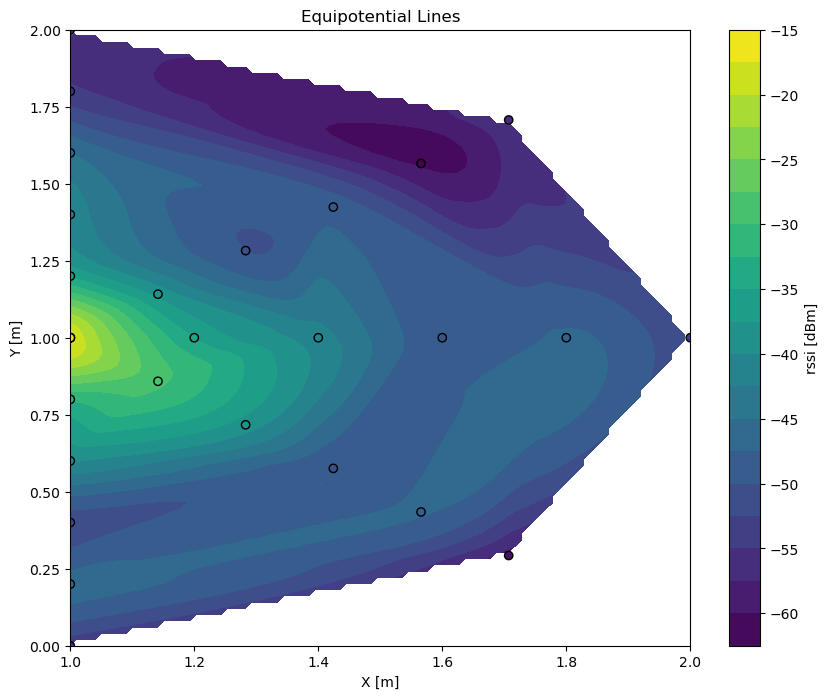

In [180]:
x = points[:,0]
# Extract x, y, and k values
x = points[:, 0]
y = points[:, 1]
k = points[:, 2]

# Create grid values first
xi = np.linspace(min(x), max(x), 100)
yi = np.linspace(min(y), max(y), 100)
xi, yi = np.meshgrid(xi, yi)

# Interpolate the data
zi = griddata((x, y), k, (xi, yi), method='cubic')

# Plot the data
plt.figure(figsize=(10, 8))
cp = plt.contourf(xi, yi, zi, 20, cmap='viridis')  # Adjust the number of levels
plt.colorbar(cp, label = 'rssi [dBm]')  # Add a color bar which maps values to colors
plt.scatter(x, y, c=k, edgecolors='k',cmap='viridis')  # Add scatter plot for original data points
plt.title('Equipotential Lines')
plt.xlabel('X [m]')
plt.ylabel('Y [m]')
plt.show()